## 第二周作业

#### 提交人学号：10245501425
#### 提交人姓名：刘至晗

#### 作业题目：
数据预处理的基本方法


数据基本信息：
数据形状: (1460, 81)
缺失值总数: 7829

任务1：缺失值检测与处理
缺失值字段及比例(%):
PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
dtype: float64
缺失值处理后总数: 0

任务2：异常值检测
用于异常值检测的核心特征: ['SalePrice', 'LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']


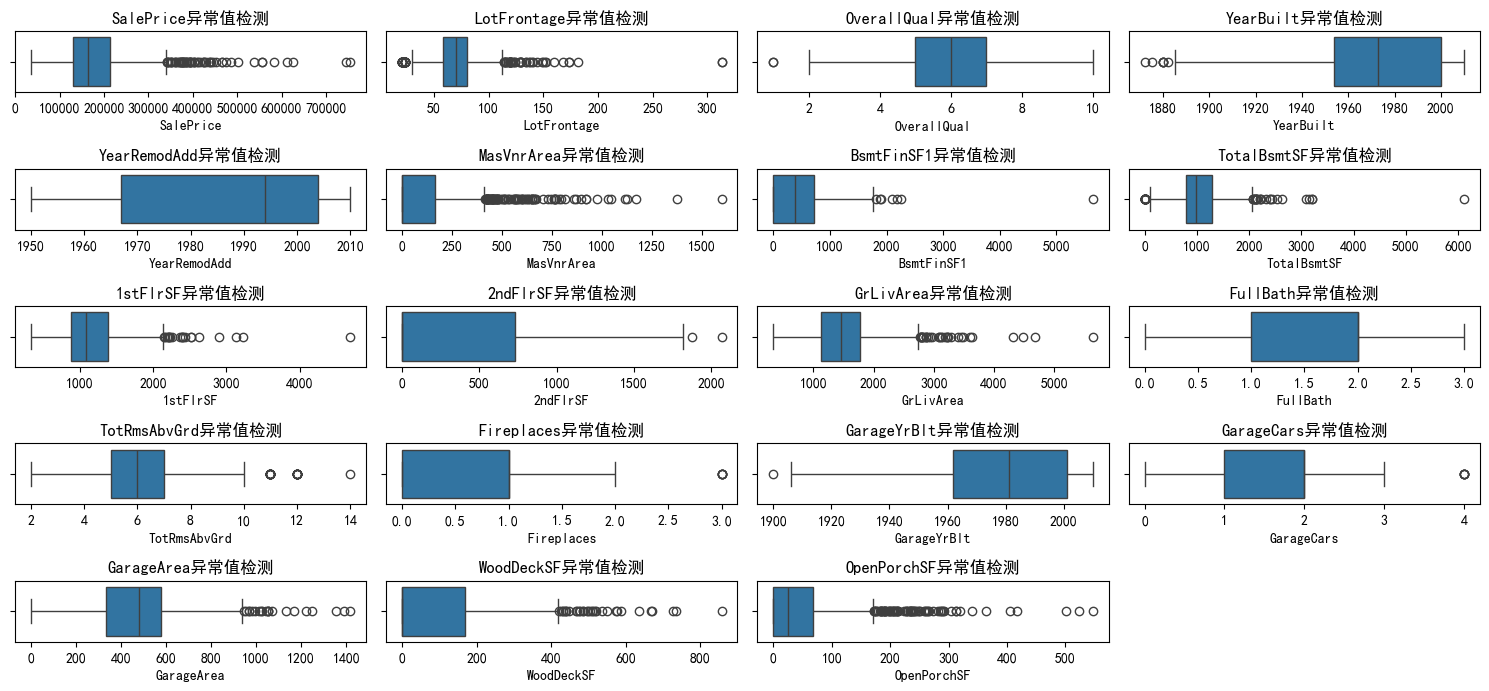

各特征异常值数量:
SalePrice       22
LotFrontage     15
OverallQual      2
YearBuilt        6
YearRemodAdd     0
MasVnrArea      32
BsmtFinSF1       6
TotalBsmtSF     10
1stFlrSF        12
2ndFlrSF         4
GrLivArea       16
FullBath         0
TotRmsAbvGrd    12
Fireplaces       5
GarageYrBlt      2
GarageCars       0
GarageArea       7
WoodDeckSF      22
OpenPorchSF     27
dtype: int64
任务3：特征间相关性分析


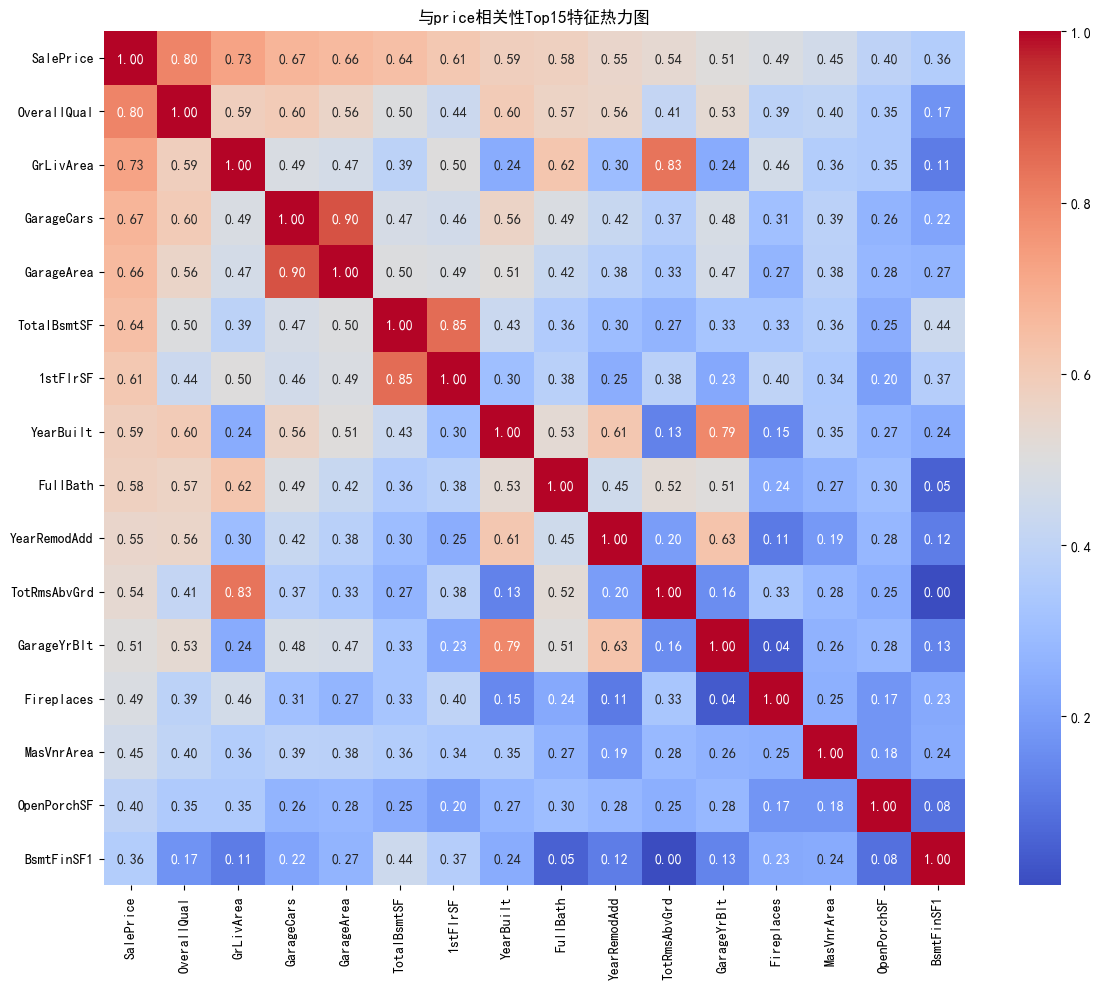

任务4：price属性标准化
标准化前price统计:
count      1460.00
mean     177364.34
std       64562.63
min       88000.00
25%      129975.00
50%      163000.00
75%      214000.00
max      326100.00
Name: SalePrice, dtype: float64

标准化后price_standardized统计:
count    1460.00
mean       -0.00
std         1.00
min        -1.38
25%        -0.73
50%        -0.22
75%         0.57
max         2.30
Name: price_standardized, dtype: float64


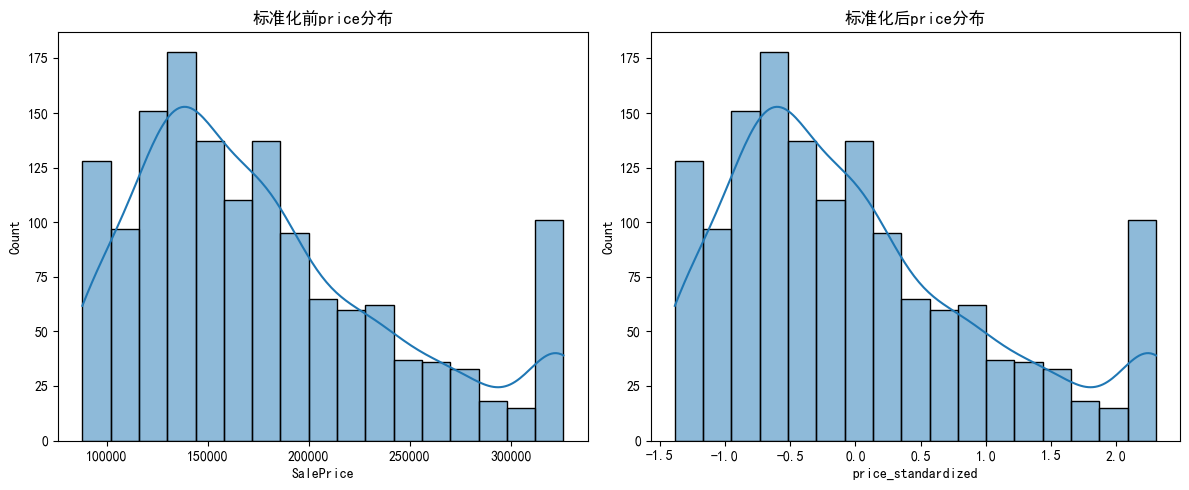

任务5：price属性离散化
price离散化区间:
等级0: [88000.00, 124000.00)
等级1: [124000.00, 147000.00)
等级2: [147000.00, 179280.00)
等级3: [179280.00, 230000.00)
等级4: [230000.00, 326100.00)

各离散等级样本数量:
price_discretized
0    289
1    291
2    296
3    287
4    297
Name: count, dtype: int64


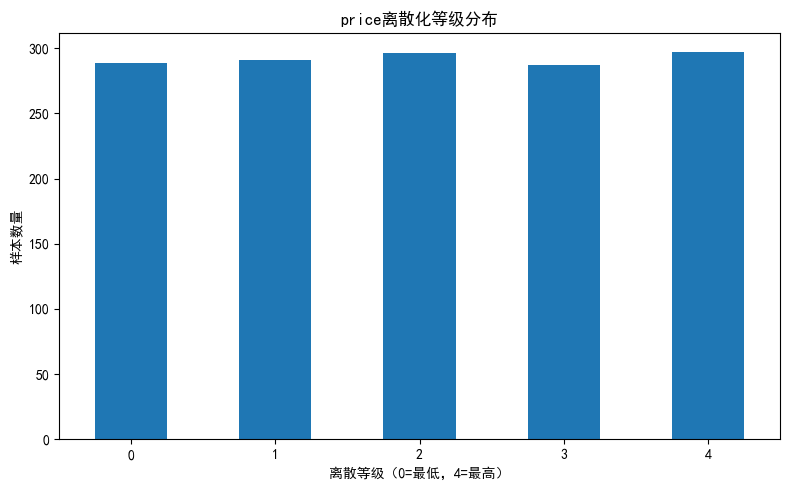

任务6：与price相关性最高的三个特征及解释
与price相关性Top3特征:
OverallQual: 0.801
GrLivArea: 0.727
GarageCars: 0.675

特征解释:
1. OverallQual: 与房价相关性最高，可能是反映房屋核心价值的关键指标（如房屋品质、核心面积等），直接影响房价定位。
2. GrLivArea: 作为第二相关特征，可能是房屋的重要配套属性，对居住体验和价值有显著影响。
3. GarageCars: 属于核心影响因素之一，可能与房屋的功能性相关，间接推动房价变化。


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv(r'E:\HuaweiMoveData\Users\liuzhihan\Desktop\train.csv')  # 假设数据集文件名为train.csv
print("数据基本信息：")
print(f"数据形状: {df.shape}")
print(f"缺失值总数: {df.isnull().sum().sum()}\n")

# 任务1：缺失值的检测与处理
print("="*50)
print("任务1：缺失值检测与处理")
# 缺失值检测
missing_ratio = df.isnull().sum() / len(df) * 100
missing_fields = missing_ratio[missing_ratio > 0].sort_values(ascending=False)
print("缺失值字段及比例(%):")
print(missing_fields.head(10))  # 展示前10个缺失率最高的字段

# 缺失值处理
# 分类变量缺失填充为"None"
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna('None') 

# 数值变量用KNN填充
num_cols = df.select_dtypes(include=[np.number]).columns
num_missing_cols = [col for col in num_cols if df[col].isnull().sum() > 0]
if num_missing_cols:
    imputer = KNNImputer(n_neighbors=5)
    df[num_missing_cols] = imputer.fit_transform(df[num_missing_cols])

print(f"缺失值处理后总数: {df.isnull().sum().sum()}\n")

# 任务2：异常值检测
print("="*50)
print("任务2：异常值检测")
# 选择核心数值特征进行异常值检测（以price及相关特征为例）
core_num_cols = ['SalePrice'] + [col for col in num_cols if col != 'SalePrice' and df[col].corr(df['SalePrice']) > 0.3]
print(f"用于异常值检测的核心特征: {core_num_cols}")

# 箱线图可视化异常值
plt.figure(figsize=(15, 8))
for i, col in enumerate(core_num_cols):
    plt.subplot(6, 4, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'{col}异常值检测')
plt.tight_layout()
plt.show()

# 3σ法则标记异常值
outliers_summary = {}
for col in core_num_cols:
    mean = df[col].mean()
    std = df[col].std()
    lower = mean - 3 * std
    upper = mean + 3 * std
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outliers_summary[col] = len(outliers)
print("各特征异常值数量:")
print(pd.Series(outliers_summary))

# 异常值处理
for col in core_num_cols:
    df[col] = df[col].astype(float)
    q5 = df[col].quantile(0.05)
    q95 = df[col].quantile(0.95)
    df.loc[df[col] < q5, col] = q5
    df.loc[df[col] > q95, col] = q95


# 任务3：特征间的相关性分析
print("="*50)
print("任务3：特征间相关性分析")
corr_matrix = df.select_dtypes(include=[np.number]).corr()
# 可视化相关性热力图（聚焦与price相关的前15个特征）
top_corr_features = corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(16).index
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix.loc[top_corr_features, top_corr_features], 
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title('与price相关性Top15特征热力图')
plt.tight_layout()
plt.show()

# 任务4：对price属性进行标准化
print("="*50)
print("任务4：price属性标准化")
scaler = StandardScaler()
df['price_standardized'] = scaler.fit_transform(df[['SalePrice']])
# 输出标准化前后统计信息
print("标准化前price统计:")
print(df['SalePrice'].describe().round(2))
print("\n标准化后price_standardized统计:")
print(df['price_standardized'].describe().round(2))

# 可视化标准化前后分布
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['SalePrice'], kde=True)
plt.title('标准化前price分布')
plt.subplot(1, 2, 2)
sns.histplot(df['price_standardized'], kde=True)
plt.title('标准化后price分布')
plt.tight_layout()
plt.show()

# 任务5：根据price属性进行离散化
print("="*50)
print("任务5：price属性离散化")
# 初始化离散化器
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile',quantile_method='linear')
# 执行离散化
df['price_discretized'] = discretizer.fit_transform(df[['SalePrice']]).astype(int)
# 输出离散化区间
bin_edges = discretizer.bin_edges_[0]
print("price离散化区间:")
for i in range(len(bin_edges)-1):
    print(f"等级{i}: [{bin_edges[i]:.2f}, {bin_edges[i+1]:.2f})")
# 统计各等级数量
print("\n各离散等级样本数量:")
print(df['price_discretized'].value_counts().sort_index())

# 可视化离散化结果
plt.figure(figsize=(8, 5))
df['price_discretized'].value_counts().sort_index().plot(kind='bar')
plt.title('price离散化等级分布')
plt.xlabel('离散等级（0=最低，4=最高）')
plt.ylabel('样本数量')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 任务6：找出与price相关性最高的三个特征及解释
print("="*50)
print("任务6：与price相关性最高的三个特征及解释")
# 计算并排序相关性
price_corr = corr_matrix['SalePrice'].sort_values(ascending=False)
top3_features = price_corr[1:4] 
print("与price相关性Top3特征:")
for feat, corr in top3_features.items():
    print(f"{feat}: {corr:.3f}")

# 特征解释
print("\n特征解释:")
print(f"1. {top3_features.index[0]}: 与房价相关性最高，可能是反映房屋核心价值的关键指标（如房屋品质、核心面积等），直接影响房价定位。")
print(f"2. {top3_features.index[1]}: 作为第二相关特征，可能是房屋的重要配套属性，对居住体验和价值有显著影响。")
print(f"3. {top3_features.index[2]}: 属于核心影响因素之一，可能与房屋的功能性相关，间接推动房价变化。")